## Skriptsprachen – 11.05.2023 – Thema heute:

# Anwendungsbeispiel: Textanalyse


## Restliche Code-Beispiele von letzter Woche

**4. `filter` selbst implementieren:**

In [109]:
from random import random
messwerte=[ int(100*random()) for i in range(100) ]

def ist_gültig(x):
    return 30<=x<=40

# prozedural
def myfilter(test, liste):
    ergebnis = []
    for x in liste:
        if test(x) == True:
            ergebnis.append(x)
    return ergebnis
myfilter(ist_gültig, messwerte)

[31, 34, 31, 40, 32, 36, 34, 35, 38, 31, 31, 39, 36]

In [110]:
messwerte[:20]

[31, 21, 60, 34, 17, 90, 50, 53, 65, 55, 20, 27, 64, 2, 68, 92, 93, 21, 57, 1]

In [111]:
# funktional, als Generator (yield)
def myfilter(test, liste):
    for x in liste:
        if test(x): yield(x)
print(myfilter(ist_gültig, messwerte))
print(list(myfilter(ist_gültig, messwerte)))

<generator object myfilter at 0x1a356c190>
[31, 34, 31, 40, 32, 36, 34, 35, 38, 31, 31, 39, 36]


In [112]:
# funktional, als list comprehension
def myfilter(test, liste):
    return [ x for x in liste if test(x) ]
print(myfilter(ist_gültig, messwerte))

[31, 34, 31, 40, 32, 36, 34, 35, 38, 31, 31, 39, 36]


## reduce

... muss aus Modul `functools` importiert werden.

In [113]:
from functools import reduce

**1. Klassiker: Summe über Plus-Operation und Startwert 0**

In [114]:
def plus(x,y): return x+y
def rsum(xs): return reduce( plus, xs, 0 )
rsum( [1,2,3] )

6

**2. String-Konkatenation**

In [117]:
reduce( lambda x,y: x+"_"+y, ["aa","bb","cc"], "!" )

'!_aa_bb_cc'

**3. join**

In [118]:
def myjoin(liste,verbinder):
    return reduce( lambda x,y: x+verbinder+y, liste, "")
myjoin(["abc", "def", "ghi"], "__")

'__abc__def__ghi'

... ist noch nicht ganz richtig: Der Verbinder taucht auch ganz vorne auf.

In [119]:
def myjoin(liste,verbinder):
    return "" if liste == [] else \
      reduce( lambda x,y: x+verbinder+y, liste[1:], liste[0])
myjoin(["abc", "def", "ghi"], "__")

'abc__def__ghi'

In [120]:
"__".join(["abc", "def", "ghi"])

'abc__def__ghi'

**4. Eigene `reduce`-Implementierung**

In [121]:
def myreduce(op, liste, start):
    return start if liste == [] else \
           myreduce(op, liste[1:], op(start,liste[0]))

myreduce( lambda x,y: x+"_"+y, ["aa","bb","cc"], "!" )

'!_aa_bb_cc'

## `partial`
... importieren aus `functools`

In [123]:
from functools import partial

def f(x,y,z): return 100*x + 10*y + z
g = partial(f,5)  # g(y,z) = f(5,y,z)
g(6,7)

567

In [124]:
h = partial(f,5,6)  # h(z) = f(5,6,z)
h(7)

567

In [125]:
def doppelt(x): return 2*x
doppler = partial(map,doppelt)
list(doppler([1,2,3,4,5]))

[2, 4, 6, 8, 10]

# Anwendungsbeispiel:  Texte mit Python analysieren

## Erkennung der Sprache anhand der Häufigkeit von Buchstaben und n-Grammen

Nun geht es um die statistische Auswertung von Texten. Ziel ist, die Zugehörigkeit eines Textes zu einer Sprache anhand der Verteilung von Buchstaben und *n-Grammen* zu bestimmen.

Die Code-Beispiele habe ich von **Prof. Gawron** (Skriptsprachen, SS 2022) übernommen.

In [126]:
def ngrams(word, n):
    """ Generiere alle n-Gramme eines Wortes """
    if len(word) < n:
        yield word
    for index in range(len(word) - (n - 1)): 
        yield word[index:index+n]

In [127]:
[ g for g in ngrams('Python', 3) ]

['Pyt', 'yth', 'tho', 'hon']

In [128]:
class Distribution:
    """ Generiere eine Statistik für Buchstaben oder n-Gramme """
    
    def __init__(self):
        self.counter = dict()
        self.count = 0
        
    def add(self, iter):
        """ Füge Elemente aus iter hinzu """
        for x in iter:
            self.count += 1
            if x in self.counter:
                self.counter[x] += 1
            else:
                self.counter[x] = 1
    
    def normalize(self):
        """ Gebe normalisierte Verteilung zurück """
        return { k:c/self.count for (k, c) in self.counter.items() }


In [129]:
import time

def read_dict(name):
    """ Lese das Wörterbuch `name` und erstelle eine Statistik der Buchstabenhäufigkeit.
        Das Wörterbuch sollte je Zeile ein Wort enthalten und in UTF-8 kodiert sein.
    """
    letters = Distribution()
    bigrams = Distribution()
    words = 0

    start = time.time()
    with open(name, 'r') as file:
        for word in file:
            word = word[:-1].lower()
            words += 1
            
            letters.add(word)
            bigrams.add(ngrams(word, 2))
    end = time.time()

    print(f"read {words:,d} words [{letters.count:,d} chars, {bigrams.count:,d} bigrams] "
          "from {name} in {end - start:.1f} seconds")
    return (letters.normalize(), bigrams.normalize())


In [130]:
GERMAN = read_dict('german.txt')
ENGLISH = read_dict('english.txt')
SPANISH = read_dict('español.txt')

read 1,996,021 words [29,056,458 chars, 27,060,437 bigrams] from {name} in {end - start:.1f} seconds
read 370,103 words [3,494,694 chars, 3,124,617 bigrams] from {name} in {end - start:.1f} seconds
read 191,667 words [1,936,738 chars, 1,745,074 bigrams] from {name} in {end - start:.1f} seconds


In [132]:
for c in sorted(GERMAN[0].items(), key=lambda a: a[1], reverse=True)[:10]:
    print(f"{c[0]} => Deutsch: {100*GERMAN[0][c[0]]:5.2f} % "
                    f" English: {100*ENGLISH[0][c[0]]:5.2f} % " 
                    f" Spanisch: {100*SPANISH[0][c[0]]:5.2f} %")

e => Deutsch: 15.19 %  English: 10.77 %  Spanisch: 10.03 %
n => Deutsch:  9.15 %  English:  7.19 %  Spanisch:  6.30 %
s => Deutsch:  7.93 %  English:  7.16 %  Spanisch:  5.03 %
r => Deutsch:  7.85 %  English:  7.04 %  Spanisch:  7.84 %
t => Deutsch:  7.05 %  English:  6.61 %  Spanisch:  4.22 %
i => Deutsch:  6.04 %  English:  8.96 %  Spanisch:  5.89 %
a => Deutsch:  5.79 %  English:  8.46 %  Spanisch: 14.05 %
l => Deutsch:  4.57 %  English:  5.58 %  Spanisch:  7.36 %
h => Deutsch:  4.15 %  English:  2.64 %  Spanisch:  0.63 %
u => Deutsch:  3.99 %  English:  3.76 %  Spanisch:  2.33 %


In [136]:
for c in sorted(GERMAN[1].items(), key=lambda a: a[1], reverse=True)[:10]:
    print(f"{c[0]} => Deutsch: {100*GERMAN[1][c[0]]:5.2f} % "
                    f" English: {100*ENGLISH[1][c[0]]:5.2f} % "
                    f" Spanisch: {100*SPANISH[1][c[0]]:5.2f} %")

en => Deutsch:  4.00 %  English:  1.23 %  Spanisch:  1.53 %
er => Deutsch:  3.68 %  English:  2.14 %  Spanisch:  1.18 %
ch => Deutsch:  2.58 %  English:  0.63 %  Spanisch:  0.33 %
te => Deutsch:  2.42 %  English:  1.42 %  Spanisch:  0.86 %
ge => Deutsch:  1.76 %  English:  0.38 %  Spanisch:  0.11 %
st => Deutsch:  1.65 %  English:  1.09 %  Spanisch:  0.85 %
ei => Deutsch:  1.53 %  English:  0.14 %  Spanisch:  0.06 %
ng => Deutsch:  1.45 %  English:  0.95 %  Spanisch:  0.23 %
un => Deutsch:  1.44 %  English:  0.88 %  Spanisch:  0.19 %
es => Deutsch:  1.31 %  English:  1.50 %  Spanisch:  1.76 %


Wir verwenden zwei verschiedene Distanzmaße:
    
* Euclid-Distanz: $\sqrt{ \sum_{i=1}^n (a_i-b_i)^2}$

* Hellinger-Distanz: $\sqrt{ \frac 1 2 \sum_{i=1}^n (\sqrt a_i- \sqrt b_i)^2}$

Vorsicht bei den Indizes, wir arbeiten mit Directories, und evtl. existiert nicht zu jedem $i$ ein $a_i$ oder $b_i$.

In [138]:
import math
import re

def euclid(a, b):
    """ Berechne den euklidischen Abstand zweier normalisierter Verteilungen """
    sum = 0

    # Erst die Schnittmenge
    for x in a.keys() & b.keys():
        sum += (a[x] - b[x])**2

    # Dann die Differenzmengen
    for x in a.keys() - b.keys():
        sum += a[x]**2
    for x in b.keys() - a.keys():
        sum += b[x]**2

    return math.sqrt(sum)
   
def hellinger(a, b):
    """ Berechne die Hellinger-Distanz zweier normalisierter Verteilungen """
    sum = 0

    # Erst die Schnittmenge
    for x in a.keys() & b.keys():
        sum += 0.5 * (math.sqrt(a[x]) - math.sqrt(b[x]))**2

    # Dann die Differenzmengen
    for x in a.keys() - b.keys():
        sum += 0.5 * a[x]
    for x in b.keys() - a.keys():
        sum += 0.5 * b[x]

    return math.sqrt(sum)

def analyze(text):
    """ Analysiere Text und berechne den Abstand zu den Sprachen """
    letters = Distribution()
    bigrams = Distribution()
    
    text = text.lower()
    for word in re.sub("[^\w]+", " ", text).split():
        letters.add(word)
        bigrams.add(ngrams(word, 2))
     
    delta = dict()
    for (lang, dist) in [ ('Deutsch', GERMAN), ('Englisch', ENGLISH), ('Spanisch', SPANISH) ]:
        delta[lang] = ( euclid(letters.normalize(), dist[0]), hellinger(letters.normalize(), dist[0]),
                        euclid(bigrams.normalize(), dist[1]), hellinger(bigrams.normalize(), dist[1]) ) 
        
    return delta

def print_report(delta):
    """ Gebe Resultate aus """
    ranking = { lang : val[3] for (lang, val) in delta.items() }
       # val[3]: Hellinger-Distanz für 2-grams
    ranking = sorted(ranking.items(), key=lambda a: a[1])
    
    print(f"Der Text ist wahrscheinlich {ranking[0][0]}")
    print()
    print("Buchstaben:")
    for res in ranking:
        lang = res[0]
        print(f"    Sprache: {lang:8} "
              f"Euklidischer Abstand: {delta[lang][0]:.2f}  "
              f"Hellinger-Abstand: {delta[lang][1]:.2f}")

    print("Bigramme:")
    for res in ranking:
        lang = res[0]
        print(f"    Sprache: {lang:8} "
              f"Euklidischer Abstand: {delta[lang][2]:.2f}  "
              f"Hellinger-Abstand: {delta[lang][3]:.2f}")      

In [180]:
# "Stufen", Hermann Hesse

text = """
Wie jede Blüte welkt und jede Jugend
Dem Alter weicht, blüht jede Lebensstufe,
Blüht jede Weisheit auch und jede Tugend
Zu ihrer Zeit und darf nicht ewig dauern.

Es muß das Herz bei jedem Lebensrufe
Bereit zum Abschied sein und Neubeginne,
Um sich in Tapferkeit und ohne Trauern
In andre, neue Bindungen zu geben.

Und jedem Anfang wohnt ein Zauber inne,
Der uns beschützt und der uns hilft, zu leben.

Wir sollen heiter Raum um Raum durchschreiten,
An keinem wie an einer Heimat hängen,
Der Weltgeist will nicht fesseln uns und engen,
Er will uns Stuf' um Stufe heben, weiten.

Kaum sind wir heimisch einem Lebenskreise
Und traulich eingewohnt, so droht Erschlaffen,
Nur wer bereit zu Aufbruch ist und Reise,
Mag lähmender Gewöhnung sich entraffen.

Es wird vielleicht auch noch die Todesstunde
Uns neuen Räumen jung entgegensenden,
Des Lebens Ruf an uns wird niemals enden ...
Wohlan denn, Herz, nimm Abschied und gesunde!
"""

delta = analyze(text)
print_report(delta)


Der Text ist wahrscheinlich Deutsch

Buchstaben:
    Sprache: Deutsch  Euklidischer Abstand: 0.09  Hellinger-Abstand: 0.17
    Sprache: Englisch Euklidischer Abstand: 0.14  Hellinger-Abstand: 0.27
    Sprache: Spanisch Euklidischer Abstand: 0.19  Hellinger-Abstand: 0.36
Bigramme:
    Sprache: Deutsch  Euklidischer Abstand: 0.07  Hellinger-Abstand: 0.47
    Sprache: Englisch Euklidischer Abstand: 0.11  Hellinger-Abstand: 0.60
    Sprache: Spanisch Euklidischer Abstand: 0.12  Hellinger-Abstand: 0.68


In [191]:
## Was da im Detail passiert...
## - val[3], s.o., Hellinger-Distanz für 2-grams
## - lambda a: a[1], sortiere nach Zahlen (nicht nach Sprachnamen)
ranking = { lang : val[3] for (lang, val) in delta.items() }
sorted(ranking.items(), key=lambda a: a[1])

[('Deutsch', 0.4682967569763273),
 ('Englisch', 0.6030063804809759),
 ('Spanisch', 0.6798428940131134)]

In [192]:
# "The road not taken", Robert Frost

text = """ 
Two roads diverged in a yellow wood,
And sorry I could not travel both
And be one traveler, long I stood
And looked down one as far as I could
To where it bent in the undergrowth;

Then took the other, as just as fair,
And having perhaps the better claim,
Because it was grassy and wanted wear;
Though as for that the passing there
Had worn them really about the same,

And both that morning equally lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way leads on to way,
I doubted if I should ever come back.

I shall be telling this with a sigh
Somewhere ages and ages hence:
Two roads diverged in a wood, and I—
I took the one less traveled by,
And that has made all the difference.
"""

delta = analyze(text)
print_report(delta)

Der Text ist wahrscheinlich Englisch

Buchstaben:
    Sprache: Englisch Euklidischer Abstand: 0.09  Hellinger-Abstand: 0.18
    Sprache: Deutsch  Euklidischer Abstand: 0.11  Hellinger-Abstand: 0.23
    Sprache: Spanisch Euklidischer Abstand: 0.11  Hellinger-Abstand: 0.30
Bigramme:
    Sprache: Englisch Euklidischer Abstand: 0.09  Hellinger-Abstand: 0.52
    Sprache: Deutsch  Euklidischer Abstand: 0.10  Hellinger-Abstand: 0.60
    Sprache: Spanisch Euklidischer Abstand: 0.11  Hellinger-Abstand: 0.62


In [193]:
# "Cantares", Antonio Machado

text = """ 
Todo pasa y todo queda, 
pero lo nuestro es pasar, 
pasar haciendo caminos, 
caminos sobre el mar. 

Nunca perseguí la gloria, 
ni dejar en la memoria 
de los hombres mi canción; 
yo amo los mundos sutiles, 
ingrávidos y gentiles, 
como pompas de jabón. 

Me gusta verlos pintarse 
de sol y grana, volar 
bajo el cielo azul, temblar 
súbitamente y quebrarse... 

Nunca perseguí la gloria. 

Caminante, son tus huellas 
el camino y nada más; 
caminante, no hay camino, 
se hace camino al andar. 

Al andar se hace camino 
y al volver la vista atrás 
se ve la senda que nunca 
se ha de volver a pisar. 

Caminante no hay camino 
sino estelas en la mar... 

Hace algún tiempo en ese lugar 
donde hoy los bosques se visten de espinos 
se oyó la voz de un poeta gritar 
"Caminante no hay camino, 
se hace camino al andar..." 

Golpe a golpe, verso a verso... 

Murió el poeta lejos del hogar. 
Le cubre el polvo de un país vecino. 
Al alejarse le vieron llorar. 
"Caminante no hay camino, 
se hace camino al andar..." 

Golpe a golpe, verso a verso... 

Cuando el jilguero no puede cantar. 
Cuando el poeta es un peregrino, 
cuando de nada nos sirve rezar. 
"Caminante no hay camino, 
se hace camino al andar..." 

Golpe a golpe, verso a verso.
"""

delta = analyze(text)
print_report(delta)

Der Text ist wahrscheinlich Spanisch

Buchstaben:
    Sprache: Spanisch Euklidischer Abstand: 0.06  Hellinger-Abstand: 0.18
    Sprache: Englisch Euklidischer Abstand: 0.09  Hellinger-Abstand: 0.19
    Sprache: Deutsch  Euklidischer Abstand: 0.13  Hellinger-Abstand: 0.29
Bigramme:
    Sprache: Spanisch Euklidischer Abstand: 0.09  Hellinger-Abstand: 0.50
    Sprache: Englisch Euklidischer Abstand: 0.09  Hellinger-Abstand: 0.54
    Sprache: Deutsch  Euklidischer Abstand: 0.11  Hellinger-Abstand: 0.63


In [154]:
# Grundgesetz für die Bundesrepublik Deutschland

text = """ 
I. Die Grundrechte

Artikel 1 
(1) Die Würde des Menschen ist unantastbar. Sie zu achten und zu schützen ist 
    Verpflichtung aller staatlichen Gewalt.
(2) Das Deutsche Volk bekennt sich darum zu unverletzlichen und unveräußerlichen 
    Menschenrechten als Grundlage jeder menschlichen Gemeinschaft, des Friedens und
    der Gerechtigkeit in der Welt.
(3) Die nachfolgenden Grundrechte binden Gesetzgebung, vollziehende Gewalt und
    Rechtsprechung als unmittelbar geltendes Recht.

Artikel 2 
(1) Jeder hat das Recht auf die freie Entfaltung seiner Persönlichkeit, soweit er
    nicht die Rechte anderer verletzt und nicht gegen die verfassungsmäßige Ordnung
    oder das Sittengesetz verstößt.
(2) Jeder hat das Recht auf Leben und körperliche Unversehrtheit. Die Freiheit der
    Person ist unverletzlich. In diese Rechte darf nur auf Grund eines Gesetzes
    eingegriffen werden.

Artikel 3 
(1) Alle Menschen sind vor dem Gesetz gleich.
(2) Männer und Frauen sind gleichberechtigt. Der Staat fördert die tatsächliche
    Durchsetzung der Gleichberechtigung von Frauen und Männern und wirkt auf die
    Beseitigung bestehender Nachteile hin.
(3) Niemand darf wegen seines Geschlechtes, seiner Abstammung, seiner Rasse, seiner
    Sprache, seiner Heimat und Herkunft, seines Glaubens, seiner religiösen oder
    politischen Anschauungen benachteiligt oder bevorzugt werden. Niemand darf wegen
    seiner Behinderung benachteiligt werden.
"""

delta = analyze(text)
print_report(delta)

Der Text ist wahrscheinlich Deutsch

Buchstaben:
    Sprache: Deutsch  Euklidischer Abstand: 0.06  Hellinger-Abstand: 0.15
    Sprache: Englisch Euklidischer Abstand: 0.12  Hellinger-Abstand: 0.25
    Sprache: Spanisch Euklidischer Abstand: 0.17  Hellinger-Abstand: 0.34
Bigramme:
    Sprache: Deutsch  Euklidischer Abstand: 0.06  Hellinger-Abstand: 0.40
    Sprache: Englisch Euklidischer Abstand: 0.10  Hellinger-Abstand: 0.55
    Sprache: Spanisch Euklidischer Abstand: 0.12  Hellinger-Abstand: 0.64


In [155]:
# Gemischt-sprachiger Text

text = """ 
(1) Alle Menschen sind vor dem Gesetz gleich.
(2) Männer und Frauen sind gleichberechtigt. Der Staat fördert die tatsächliche
    Durchsetzung der Gleichberechtigung von Frauen und Männern und wirkt auf die
    Beseitigung bestehender Nachteile hin.
(3) Niemand darf wegen seines Geschlechtes, seiner Abstammung, seiner Rasse, seiner
    Sprache, seiner Heimat und Herkunft, seines Glaubens, seiner religiösen oder
    politischen Anschauungen benachteiligt oder bevorzugt werden. Niemand darf wegen
    seiner Behinderung benachteiligt werden.

Hace algún tiempo en ese lugar 
donde hoy los bosques se visten de espinos 
se oyó la voz de un poeta gritar 
"Caminante no hay camino, 
se hace camino al andar..." 

Golpe a golpe, verso a verso... 

Murió el poeta lejos del hogar. 
Le cubre el polvo de un país vecino. 
Al alejarse le vieron llorar. 
"Caminante no hay camino, 
se hace camino al andar..."

Then took the other, as just as fair,
And having perhaps the better claim,
Because it was grassy and wanted wear;
Though as for that the passing there
Had worn them really about the same,

And both that morning equally lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way leads on to way,
I doubted if I should ever come back.
"""

delta = analyze(text)
print_report(delta)

Der Text ist wahrscheinlich Englisch

Buchstaben:
    Sprache: Englisch Euklidischer Abstand: 0.07  Hellinger-Abstand: 0.14
    Sprache: Deutsch  Euklidischer Abstand: 0.06  Hellinger-Abstand: 0.15
    Sprache: Spanisch Euklidischer Abstand: 0.11  Hellinger-Abstand: 0.26
Bigramme:
    Sprache: Englisch Euklidischer Abstand: 0.07  Hellinger-Abstand: 0.44
    Sprache: Deutsch  Euklidischer Abstand: 0.06  Hellinger-Abstand: 0.44
    Sprache: Spanisch Euklidischer Abstand: 0.09  Hellinger-Abstand: 0.53


Das kann nicht funktionieren, weil dieser Text halt weder typische deutsche noch englische noch spanische Häufigkeiten hat.

# Die `collections` Library

## Zählen mit `Counter` oder `defaultdict`

Oben haben wir Buchstabenhäufigkeiten "von Hand" über `dict` gezählt.
Dabei mussten wir uns unter anderem darum kümmern, dass `dict` Zugriffe auf nicht existierende Einträge mit einer Exception quittiert.

Dieses Problem löst `defaultdict` (schon in früherer Vorlesung gesehen).

In [157]:
import random
from collections import defaultdict

count = defaultdict(int)

for i in range(100):
    count[random.choice(range(6))] += 1
    
print(count)

defaultdict(<class 'int'>, {4: 19, 5: 17, 3: 14, 1: 17, 2: 21, 0: 12})


Noch einfacher geht das reine Zählen mit der Klasse `Counter`.

Im Folgenden verwenden wir sie, um die Häufigkeitsverteilung von Wörten zu bestimmen. Als "Testobjekt" verwenden wir den Roman *Dracula* von Bram Stoker.


In [159]:
from collections import Counter
import re

with open("dracula.txt", "r") as file:
    text = file.read()

print(text[10000:11000])
print (len(text))

ut the rosary round my neck; 
and said, "For your mother's sake," and went out of the room. 
I am writing up this part of the diary whilst I am waiting for 
the coach, which is, of course, late; and the crucifix is still round 
my neck. Whether it is the old lady's fear, or the many ghostly 
traditions of this place, or the crucifix itself, I do not know, but 
I am not feeling nearly as easy in my mind as usual. If this book 
should ever reach Mina before I do, let it bring my good-bye. 
Here comes the coach! 

5 May. The Castle. The grey of the morning has passed, and 
the sun is high over the distant horizon, which seems jagged, 
whether with trees or hills I know not, for it is so far off that big 
things and little are mixed. I am not sleepy, and, as I am not to 
be called till I awake, naturally I write till sleep comes. There 
are many odd things to put down, and, lest who reads them may 
fancy that I dined too well before I left Bistritz, let me put down 
my dinner exactly. I di

In [160]:
text = re.sub("[.,;_=:!?\"\'»«]+", "", text)
words = re.sub("[^\w]+", " ", text.lower()).split(' ')
print(words[1000:1010])

['set', 'down', 'at', 'once', 'as', 'some', 'old', 'oriental', 'band', 'of']


In [161]:
counter = Counter(words)
counter.most_common(20)

[('the', 7821),
 ('and', 5857),
 ('i', 4753),
 ('to', 4620),
 ('of', 3571),
 ('a', 2933),
 ('he', 2543),
 ('in', 2454),
 ('that', 2439),
 ('it', 2130),
 ('was', 1857),
 ('as', 1571),
 ('we', 1533),
 ('for', 1520),
 ('is', 1481),
 ('his', 1457),
 ('me', 1443),
 ('not', 1384),
 ('you', 1378),
 ('with', 1271)]

In [164]:
counter.most_common(400)[-10:]

[('around', 45),
 ('moved', 45),
 ('counts', 45),
 ('none', 45),
 ('until', 45),
 ('un', 45),
 ('barkers', 44),
 ('called', 44),
 ('people', 44),
 ('women', 44)]

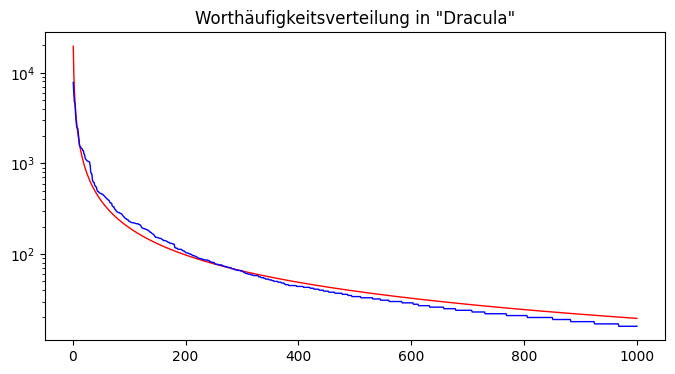

In [169]:
import matplotlib.pyplot as plt

N = 1000
x = range(1, N+1)
y = [ zahl for (wort, zahl) in counter.most_common(N) ]
plt.figure(figsize=(8,4))
plt.title('Worthäufigkeitsverteilung in "Dracula"')
#plt.xscale('log')
plt.yscale('log')
plt.plot(x, [ 2.5*max(y)/x for x in range(1, N+1) ], linewidth=1, color='r')
plt.plot(x, y, linewidth=1, color='b')
plt.show()

... bestätigt das **Zipf-sche Gesetz** (https://de.wikipedia.org/wiki/Zipfsches_Gesetz): 

Wenn die Elemente einer Menge – beispielsweise die Wörter eines Textes – nach ihrer Häufigkeit geordnet werden, ist die Wahrscheinlichkeit $p$ ihres Auftretens umgekehrt proportional zum Platz $n$ auf der Häufigkeitsliste (hier kurz „Rang“ genannt):
$ p(n) \sim 1/n $

# Analyse von PDF-Dokumenten

Viele Dokumente liegen als PDF-Dateien vor. Auch diese lassen sich mit Python analysieren. Wir verwenden hier Tika-Python (https://github.com/chrismattmann/tika-python) 


In [171]:
# in Shell:
# pip install tika

import re
from tika import parser

raw = parser.from_file('dnh3.pdf')
text = raw['content']

# Ausgabe von text[0:1000]
for z in filter(lambda x: x != "",text[0:1000].split("\n")): print (z, end="... ")

Wissenswertes... Zuständigkeiten von ... Fakultätsrat und Dekanat... hlb aktuell... Erfolg braucht starke HAW,... Delegierte wählen ... Bundespräsidium... Campusnotizen... Fortschritte beim ... Promotionsrecht... Ausgabe 03-2019... 5 16... FÜR ANWENDUNGSBEZOGENE WISSENSCHAFT UND KUNST... 34... Afrika – Chancen und ... Entwicklungen... 50-jä... hrig... es J... ubilä... um...  d... er ... H... ochsc... hulen fü... r a... ngew... andte...  ... W... is... se... nsc... hafte... n/F... achhochsc... hulen ... Seite...  18... –27... Aus Wissenschaft  ... & Politik... Bildungsaufstieg ohne Abitur... 32... Campusnotizen hlb aktuell... 4 HAW Hamburg: Chatbots, Smart ... Speaker und andere intelligente ... Assistenten...  Hochschule Niederrhein: KI für ... medizinische Untersuchungen der ... Schwerelosigkeit... 5 TH Mittelhessen: „Dr.-Ing.“ an TH ... Mittelhessen möglich...  FH Münster: International qualifiziert ... – über Europa hinaus... 6 Hochschule Wismar: Studierende ... bauen in Südafrika..

In [172]:
print(raw["metadata"])

{'pdf:PDFVersion': '1.7', 'xmp:CreatorTool': 'Adobe InDesign 14.0 (Macintosh)', 'pdf:hasXFA': 'false', 'access_permission:can_print_degraded': 'true', 'X-TIKA:Parsed-By-Full-Set': ['org.apache.tika.parser.DefaultParser', 'org.apache.tika.parser.pdf.PDFParser'], 'X-TIKA:content_handler': 'ToTextContentHandler', 'pdf:num3DAnnotations': '0', 'dc:format': 'application/pdf; version=1.7', 'pdf:docinfo:creator_tool': 'Adobe InDesign 14.0 (Macintosh)', 'access_permission:fill_in_form': 'true', 'pdf:hasCollection': 'false', 'pdf:encrypted': 'false', 'pdf:containsNonEmbeddedFont': 'false', 'xmp:CreateDate': '2019-06-11T00:24:00Z', 'pdf:hasMarkedContent': 'false', 'xmp:ModifyDate': '2019-06-11T00:24:30Z', 'access_permission:extract_for_accessibility': 'true', 'resourceName': "b'dnh3.pdf'", 'xmpMM:DerivedFrom:DocumentID': 'xmp.did:6861e407-bae0-4841-8ce1-b05c79bde8e6', 'X-TIKA:Parsed-By': ['org.apache.tika.parser.DefaultParser', 'org.apache.tika.parser.pdf.PDFParser'], 'X-TIKA:embedded_depth': '0'


## Inhaltliche Analyse mit `spacy`

Wir wollen Personen und Organisationen im Text erkennen und verwenden dazu das Paket `spacy` (https://spacy.io/), das passende Modelle u.a. auch für Deutsch bereitstellt.

Als Beispiel suchen wir in der Zeitschrift "Die Neue Hochschule" nach der Fachhochschule Südwestfalen und in diesem Zusammenhang auftretende Personen.


In [173]:
# in Shell: 
# pip install spacy
# python3.10 -m spacy download de_core_news_md

import spacy
nlp = spacy.load('de_core_news_md')
doc = nlp(text)

In [174]:
for X in doc.ents[:20]:
    print(X.label_, ":", X.text) 

ORG : HAW
ORG : ANWENDUNGSBEZOGENE
LOC : Afrika
LOC : H
ochsc
LOC : fü
r a

ngew
andte
LOC : hulen
ORG : HAW Hamburg
ORG : Hochschule Niederrhein
ORG : KI
ORG : TH Mittelhessen
ORG : TH 
Mittelhessen
ORG : FH Münster
LOC : Europa
LOC : Wismar
LOC : Südafrika
LOC : Kenia
ORG : HAW Ostafrika
ORG : HTW Berlin
ORG : HAW
PER : Jochen Struwe


In [176]:
orgs = [ X for X in doc.ents if X.label_ == 'ORG']
orgs[200:210]

[Landesverband Bayern,
 VHB,
 VHB,
 „hochschule dual,
 Hochschule Osnabrück,
 TH Wildau,
 Hochschule Trier,
 Umwelt-Cam-
 pus Birkenfeld,
 Fachhochschule Südwestfalen,
 IT]

In [177]:
personen = [ X for X in doc.ents if X.label_ == 'PER']
personen[:10]

[Jochen Struwe,
 Dr. Thomas 
 Schmidt,
 Olaf Jacob,
 Hans R. 
 Friedrich,
 Nicolai Müller-Bromley,
 Camille Logeay,
 Thomas Schmidt,
 Olaf Jacob,
 Industriekooperationen,
 Goethes]

In [178]:
fh_swf = []

for org in orgs:
    if org.text.find("Südwestfalen") >= 0:
        print(f"{org} {org.start} {org.end}")
        fh_swf.append(org)

Fachhochschule Südwestfalen 10701 10703
FH Südwestfalen 25780 25782
FH Südwestfalen 25897 25899


In [179]:
def dist(x, y):
    mx = (x.start + x.end) / 2
    my = (y.start + y.end) / 2
    return (mx - my) * (mx - my)

for x in fh_swf:
    for p in sorted(personen, key = lambda p: dist(p, x))[:5]:
        tp = str(p).replace("\n","")
        print(f"{x} / {tp} / {dist(p, x)}")
    print()

Fachhochschule Südwestfalen / Olga Rösch / 20.25
Fachhochschule Südwestfalen / Jochen Struwe / 380.25
Fachhochschule Südwestfalen / Reza Samanpour / 400.0
Fachhochschule Südwestfalen / Olga Rösch / 1024.0
Fachhochschule Südwestfalen / Nicolai Müller-Brom-ley / 2025.0

FH Südwestfalen / Bastian Quattelbaum / 25.0
FH Südwestfalen / Gerrit Pohlmann / 36.0
FH Südwestfalen / Ulrich Odefey / 324.0
FH Südwestfalen / Christoph Quix / 484.0
FH Südwestfalen / Nicoletta Messerschmidt / 841.0

FH Südwestfalen / Karin Wehmeyer / 36.0
FH Südwestfalen / Hendrik Wöhrle / 36.0
FH Südwestfalen / Sieweke / 552.25
FH Südwestfalen / Susanne Bennewitz / 784.0
FH Südwestfalen / Christian Schwede / 1521.0

